In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [219]:
# Load the Excel file
df = pd.read_excel(r"C:\Users\sadaa\Downloads\walmart Data.xlsx")
# Display the first few rows
df.head()

,City,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,0.68,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,0.00,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,0.56,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,0.39,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,0.69,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [95]:
df.tail(5)

,City,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
8394,Fairfield,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,0.59,...,-15.07,West,7142,448.10,2015-12-30,Express Air,4.51,California,13.48,94533
8395,Harker Heights,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,0.39,...,-18.66,Central,3583,257.46,2015-12-30,Express Air,4.23,Texas,7.28,76543
8396,Riverview,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,0.37,...,-1.29,South,6361,14.15,2015-12-30,Regular Air,0.70,Florida,1.48,33569
8397,Nicholasville,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,0.83,...,-745.20,South,6916,803.33,2015-12-30,Regular Air,24.49,Kentucky,832.81,40356
8398,Nicholasville,Maribeth Yedwab,Home Office,0.00,1,2015-12-30,49344,Low,31,0.68,...,27.85,South,6915,672.93,2015-12-30,Regular Air,4.00,Kentucky,19.98,40356


In [221]:
df.shape

(8399, 24)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Name         8399 non-null   object        
 2   Customer Segment      8399 non-null   object        
 3   Discount              8399 non-null   float64       
 4   Number of Records     8399 non-null   int64         
 5   Order Date            8399 non-null   datetime64[ns]
 6   Order ID              8399 non-null   int64         
 7   Order Priority        8399 non-null   object        
 8   Order Quantity        8399 non-null   int64         
 9   Product Base Margin   8399 non-null   float64       
 10  Product Category      8399 non-null   object        
 11  Product Container     8399 non-null   object        
 12  Product Name          8399 non-null   object        
 13  Product Sub-Catego

In [225]:
df.describe()

,Discount,Number of Records,Order Date,Order ID,Order Quantity,Product Base Margin,Profit,Row ID,Sales,Ship Date,Shipping Cost,Unit Price,Zip Code
count,8399.000000,8399.0,8399,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399,8399.000000,8399.000000,8399.000000
mean,0.049671,1.0,2013-12-24 18:31:30.225026560,29965.179783,25.571735,0.508669,181.184422,4200.000000,1775.878179,2013-12-26 19:17:37.411596544,12.838557,89.346259,52839.139421
min,0.000000,1.0,2012-01-01 00:00:00,3.000000,1.000000,0.000000,-14140.701600,1.000000,2.240000,2012-01-02 00:00:00,0.490000,0.990000,1001.000000
25%,0.020000,1.0,2012-12-20 00:00:00,15011.500000,13.000000,0.380000,-83.315000,2100.500000,143.195000,2012-12-22 12:00:00,3.300000,6.480000,30337.000000
50%,0.050000,1.0,2013-12-17 00:00:00,29857.000000,26.000000,0.520000,-1.500000,4200.000000,449.420000,2013-12-18 00:00:00,6.070000,20.990000,52732.000000
75%,0.080000,1.0,2015-01-01 12:00:00,44596.000000,38.000000,0.590000,162.748000,6299.500000,1709.320000,2015-01-03 12:00:00,13.990000,85.990000,77577.000000
max,0.250000,1.0,2015-12-30 00:00:00,59973.000000,50.000000,0.850000,27220.690000,8399.000000,89061.050000,2015-12-30 00:00:00,164.730000,6783.020000,99362.000000
std,0.031823,0.0,NaN,17260.883447,14.481071,0.142134,1196.653326,2424.726789,3585.050525,NaN,17.264052,290.354383,28509.535635


In [227]:
df.isnull().sum()

City                    0
Customer Name           0
Customer Segment        0
Discount                0
Number of Records       0
Order Date              0
Order ID                0
Order Priority          0
Order Quantity          0
Product Base Margin     0
Product Category        0
Product Container       0
Product Name            0
Product Sub-Category    0
Profit                  0
Region                  0
Row ID                  0
Sales                   0
Ship Date               0
Ship Mode               0
Shipping Cost           0
State                   0
Unit Price              0
Zip Code                0
dtype: int64

In [229]:
#finding duplicates
duplicate_rows = df[df.duplicated()]
print("\nNumber of Duplicate Rows:", duplicate_rows.shape[0])

# Drop duplicate rows
df = df.drop_duplicates()
print("\nDuplicates removed. Shape of DataFrame:", df.shape)


Number of Duplicate Rows: 0

Duplicates removed. Shape of DataFrame: (8399, 24)


In [231]:
time_series_data = df[['Order Date', 'Sales']]

In [233]:
time_series_data = time_series_data.groupby('Order Date').sum().reset_index()

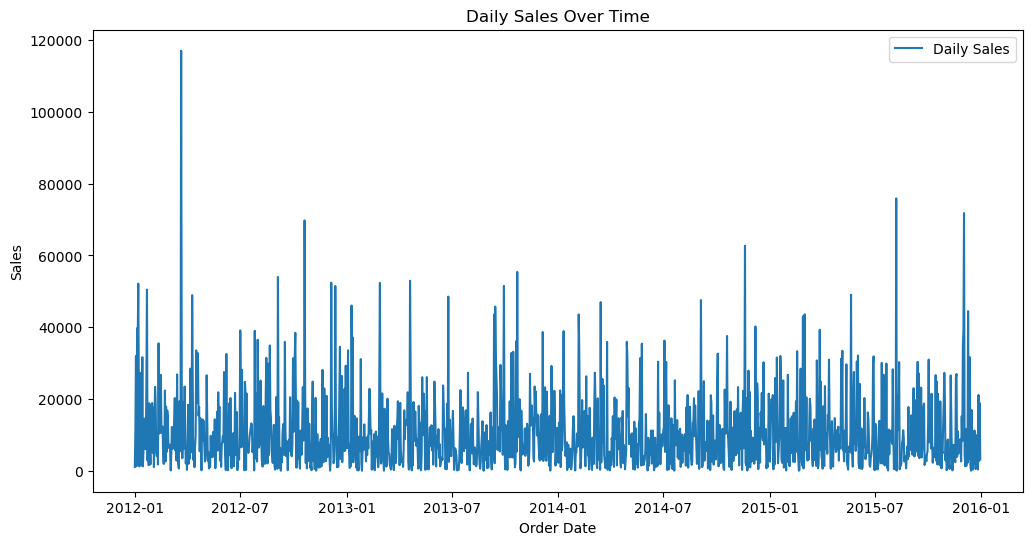

In [235]:
# Step 3: Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Order Date'], time_series_data['Sales'], label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [237]:
print("Missing values:")
print(time_series_data.isnull().sum())

Missing values:
Order Date    0
Sales         0
dtype: int64


<Axes: >

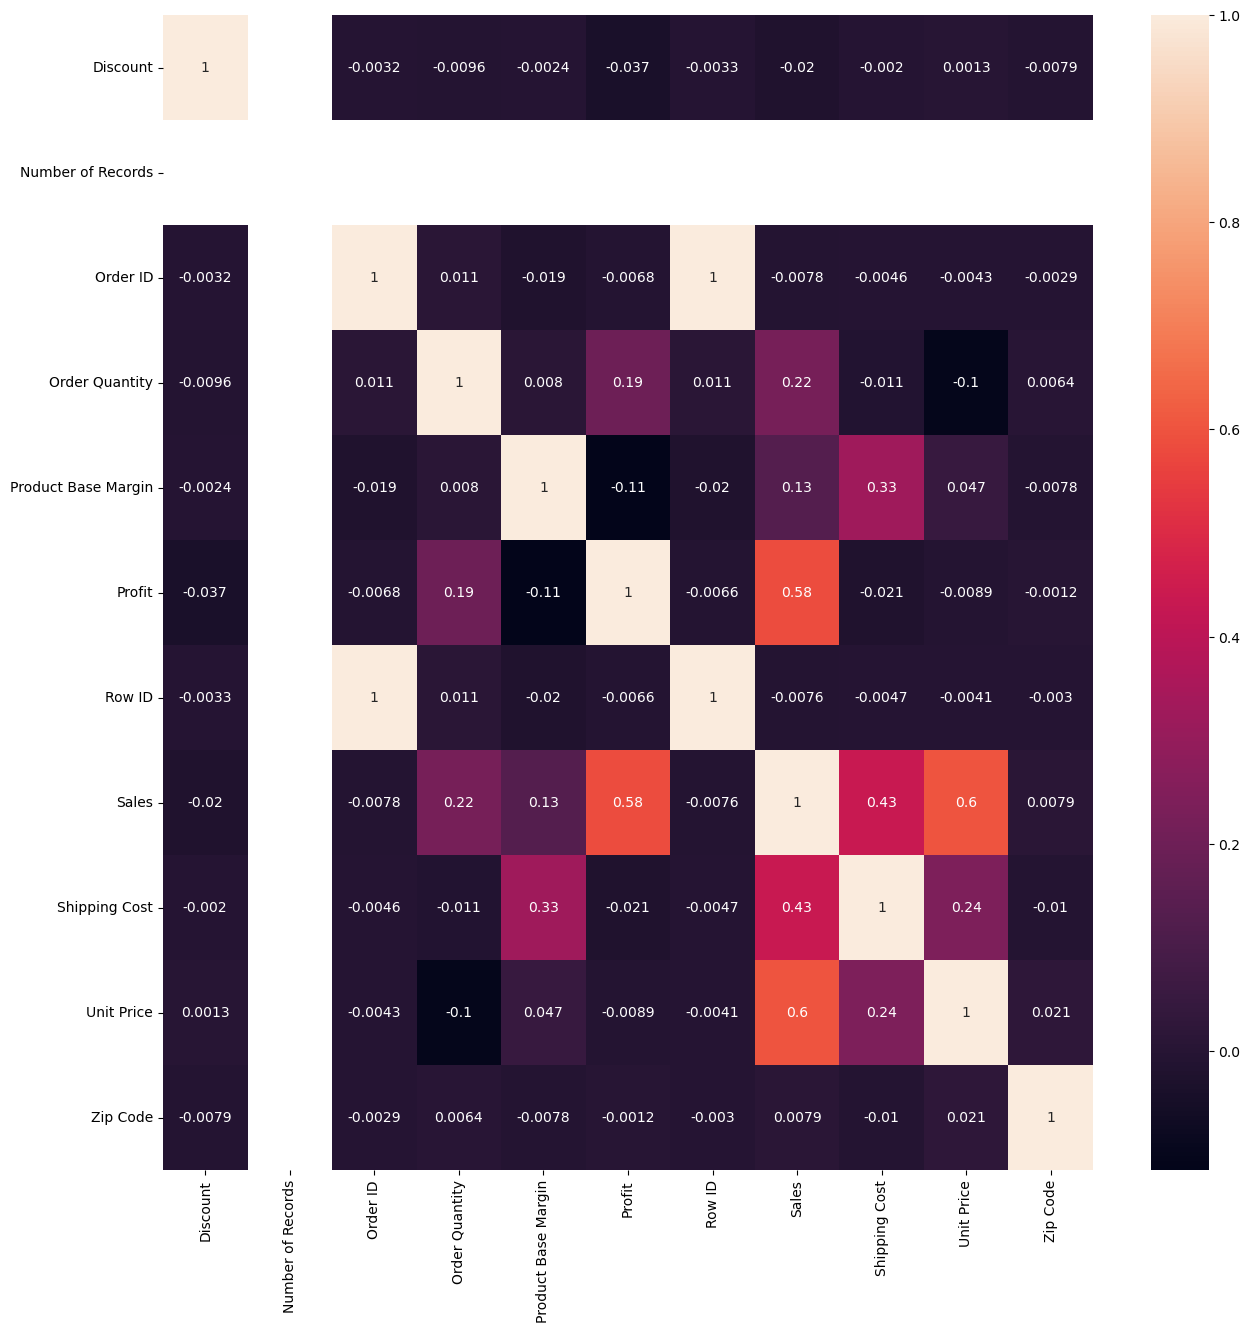

In [239]:
plt.figure(figsize=(15,15))
s=df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

In [277]:
# Extract insights from date columns
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Processing Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

print("\nDate Features Added:\n")
print(df[['Order Date', 'Ship Date', 'Order Year', 'Order Month', 'Processing Time (Days)']].head())


Date Features Added:

  Order Date  Ship Date  Order Year  Order Month  Processing Time (Days)
0 2012-01-01 2012-01-02        2012            1                       1
1 2012-01-01 2012-01-03        2012            1                       2
2 2012-01-02 2012-01-02        2012            1                       0
3 2012-01-02 2012-01-02        2012            1                       0
4 2012-01-02 2012-01-04        2012            1                       2


<Axes: title={'center': 'Monthly Seasonality'}, xlabel='Month'>

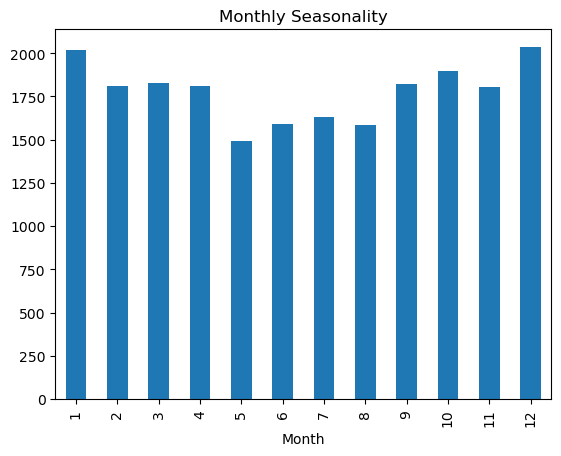

In [253]:
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].mean()
monthly_sales.plot(kind='bar', title='Monthly Seasonality')


In [255]:
result = adfuller(time_series_data['Sales'])
print("\nAugmented Dickey-Fuller Test:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")


Augmented Dickey-Fuller Test:
ADF Statistic: -36.099988804309206
p-value: 0.0
The series is stationary.


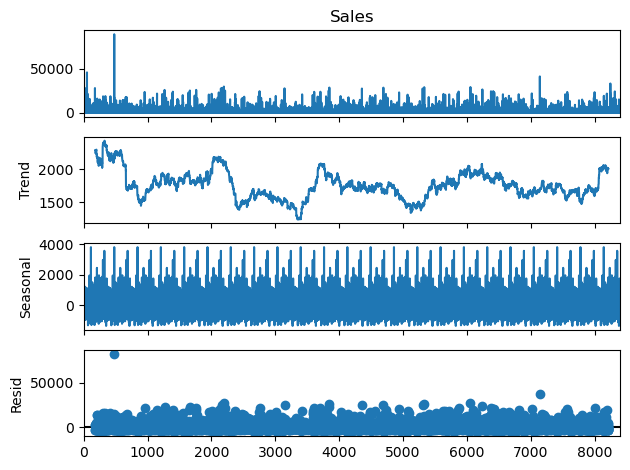

In [257]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df['Sales'], model='additive', period=365)
decompose_result.plot();


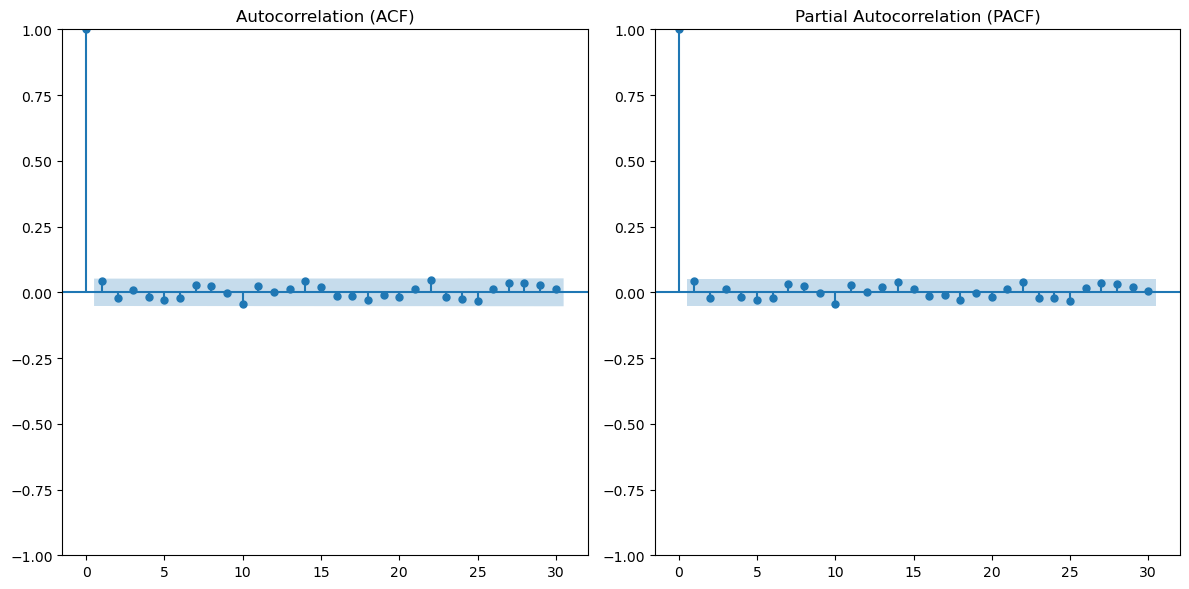

In [259]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(time_series_data['Sales'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(time_series_data['Sales'], ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation (PACF)')
plt.tight_layout()
plt.show()


In [261]:
# Detect outliers in numeric columns using the IQR method
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | 
            (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers Detected in Numeric Columns:\n", outliers)



Outliers Detected in Numeric Columns:
 Discount                     3
Number of Records            0
Order ID                     0
Order Quantity               0
Product Base Margin         63
Profit                    1704
Row ID                       0
Sales                     1042
Shipping Cost              972
Unit Price                 848
Zip Code                     0
Processing Time (Days)    1143
dtype: int64



Sales Outliers in First 2000 Rows (Z-Score Method):
Total Outliers: 47
Sample Outliers:
       Sales  Sales_zscore
17  28359.40      6.430723
37  26133.39      5.889624
52  45923.76     10.700269
61  21752.01      4.824598
81  15137.11      3.216648

Profit Outliers in First 2000 Rows (Z-Score Method):
Total Outliers: 41
Sample Outliers:
        Profit  Profit_zscore
17   14440.390       9.625696
37  -11053.600      -7.595589
61    9296.348       6.150877
81    4913.160       3.190017
177   7513.880       4.946813


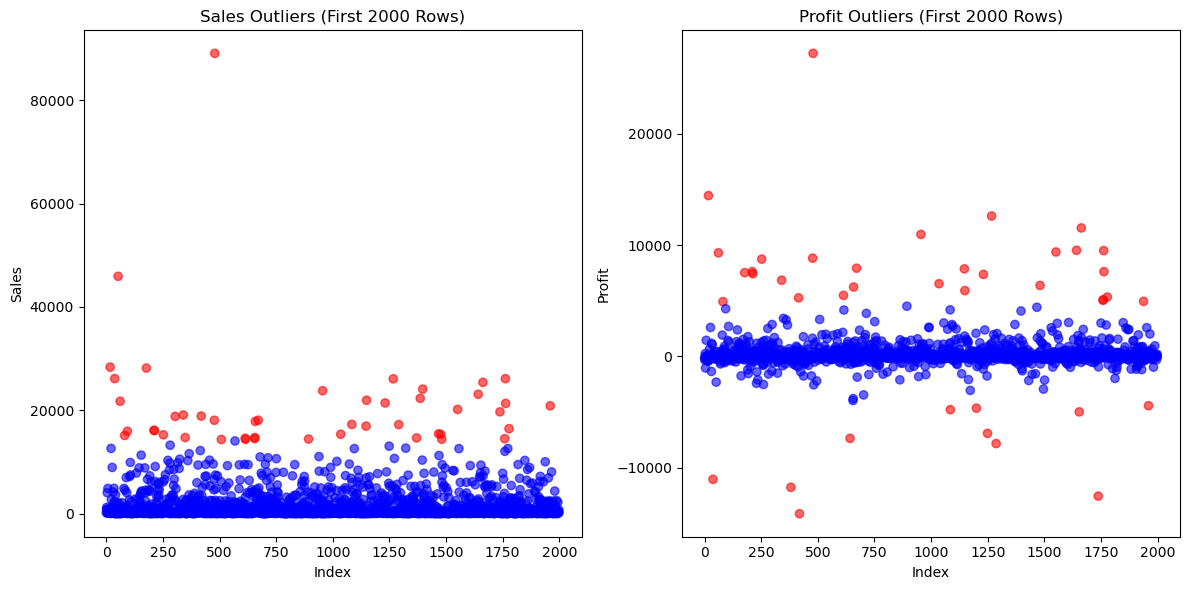

In [271]:
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Step 1: Subset the first 1000 rows
df_subset = df.head(2000)

# Step 2: Define the columns to analyze
columns_to_check = ['Sales', 'Profit']

# Step 3: Calculate Z-scores and detect outliers
for column in columns_to_check:
    # Compute Z-scores for the subset
    df_subset[f'{column}_zscore'] = zscore(df_subset[column])
    
    # Identify outliers where |Z| > 3
    df_subset[f'{column}_outlier'] = abs(df_subset[f'{column}_zscore']) > 3
    outliers = df_subset[df_subset[f'{column}_outlier']]
    
    # Print summary of outliers
    print(f"\n{column} Outliers in First 2000 Rows (Z-Score Method):")
    print(f"Total Outliers: {outliers.shape[0]}")
    print(f"Sample Outliers:\n{outliers[[column, f'{column}_zscore']].head()}")

# Step 4: Visualize Outliers Using Scatter Plot
plt.figure(figsize=(12, 6))

# Scatter plot for Sales
plt.subplot(1, 2, 1)
plt.scatter(range(len(df_subset)), df_subset['Sales'], c=df_subset['Sales_outlier'].map({True: 'red', False: 'blue'}), alpha=0.6)
plt.title('Sales Outliers (First 2000 Rows)')
plt.xlabel('Index')
plt.ylabel('Sales')

# Scatter plot for Profit
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_subset)), df_subset['Profit'], c=df_subset['Profit_outlier'].map({True: 'red', False: 'blue'}), alpha=0.6)
plt.title('Profit Outliers (First 2000 Rows)')
plt.xlabel('Index')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()



Sales Outliers in First 1000 Rows (IQR Method):
Total Outliers: 120
Lower Bound: -2575.5041875, Upper Bound: 4691.2403125
Sample Outliers:
       Sales
7    4902.38
17  28359.40
21  12635.75
26   8958.46
34   4913.70

Profit Outliers in First 1000 Rows (IQR Method):
Total Outliers: 187
Lower Bound: -549.76125, Upper Bound: 677.1287500000001
Sample Outliers:
      Profit
4   -1049.85
7    1438.49
17  14440.39
26   2593.14
30  -1358.90


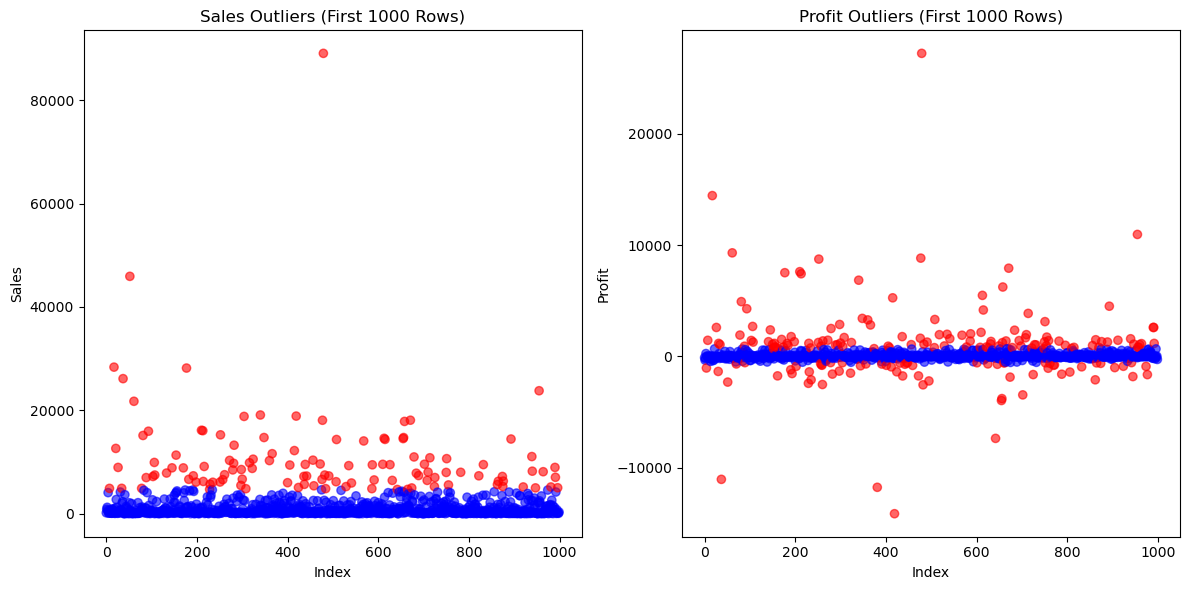

In [273]:
import matplotlib.pyplot as plt

# Step 1: Subset the first 1000 rows
df_subset = df.head(1000)

# Step 2: Define the columns to analyze
columns_to_check = ['Sales', 'Profit']

# Step 3: Detect outliers using the IQR method
for column in columns_to_check:
    # Calculate Q1, Q3, and IQR
    Q1 = df_subset[column].quantile(0.25)
    Q3 = df_subset[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Flag outliers
    df_subset[f'{column}_outlier'] = (df_subset[column] < lower_bound) | (df_subset[column] > upper_bound)
    
    # Print summary
    outliers = df_subset[df_subset[f'{column}_outlier']]
    print(f"\n{column} Outliers in First 1000 Rows (IQR Method):")
    print(f"Total Outliers: {outliers.shape[0]}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Sample Outliers:\n{outliers[[column]].head()}")

# Step 4: Visualize Outliers Using Scatter Plot
plt.figure(figsize=(12, 6))

# Scatter plot for Sales
plt.subplot(1, 2, 1)
plt.scatter(range(len(df_subset)), df_subset['Sales'], c=df_subset['Sales_outlier'].map({True: 'red', False: 'blue'}), alpha=0.6)
plt.title('Sales Outliers (First 1000 Rows)')
plt.xlabel('Index')
plt.ylabel('Sales')

# Scatter plot for Profit
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_subset)), df_subset['Profit'], c=df_subset['Profit_outlier'].map({True: 'red', False: 'blue'}), alpha=0.6)
plt.title('Profit Outliers (First 1000 Rows)')
plt.xlabel('Index')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()


In [61]:
output_path = r"C:\MyProjects\processed_data.csv"
df.to_csv(output_path, index=False)
print(f"Data successfully saved to {output_path}")

Data successfully saved to C:\MyProjects\processed_data.csv


In [275]:
output_path = r"C:\MyProjects\EDA_dataset.csv"
df.to_csv(output_path, index=False)
print(f"Data successfully saved to {output_path}")

Data successfully saved to C:\MyProjects\EDA_dataset.csv


In [279]:
output_path = r"C:\MyProjects\EDA.csv"
df.to_csv(output_path, index=False)
print(f"Data successfully saved to {output_path}")

Data successfully saved to C:\MyProjects\EDA.csv
